---

# Análise Exploratoria 

#### Grupo: Isadora Dalberto, Lais da Silva, Gabriela Moreno e Stephanie Liu

---

In [2]:
# --------------- Importando biblotecas ---------------
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import norm, probplot
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats


In [3]:
# --------------- Leitura dos dados ---------------
dados = pd.read_excel("HappinessAlcoholConsumption.xls")

In [4]:
dados_indice = dados.set_index("Country")

In [5]:
list(dados)

['Country',
 'Region',
 'Hemisphere',
 'HappinessScore',
 'HDI',
 'GDP_PerCapita',
 'Beer_PerCapita',
 'Spirit_PerCapita',
 'Wine_PerCapita']

# Variáveis qualitativas e quantitativas 
* **Qualitativas:**
Country, Region, Hemisphere
* **Quantitativas:**
HappinessScore, HDI, GDP_PerCapita, Beer_PerCapita, Spirit_PerCapita, Wine_PerCapita

# Modelo e Valor de Saída
* **Modelo:** Vamos utilizar regressões para analisar o quanto outras variaveis influenciam na felicidade da população, como IDH, PIB e taxa de bebida alcoólicas 
* **Valor de saída:**
Valores de influência de cada variável na felicidade 



In [6]:
dados.describe()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,5.524828,740.877049,91.482836,137.565574,96.598361,66.598361
std,1.148736,149.846124,209.577313,104.817353,81.435028,88.121503
min,3.069000,351.000000,1.029000,1.000000,1.000000,1.000000
25%,4.528250,663.750000,4.134250,38.250000,25.500000,5.000000
50%,5.542000,757.500000,12.016000,125.500000,82.500000,16.000000
75%,6.477000,861.500000,41.990000,224.750000,142.500000,112.750000
max,7.526000,951.000000,953.000000,376.000000,373.000000,370.000000


In [7]:
x_vars=["HappinessScore", "HDI", "GDP_PerCapita", "Beer_PerCapita","Spirit_PerCapita","Wine_PerCapita"]
y_vars = x_vars

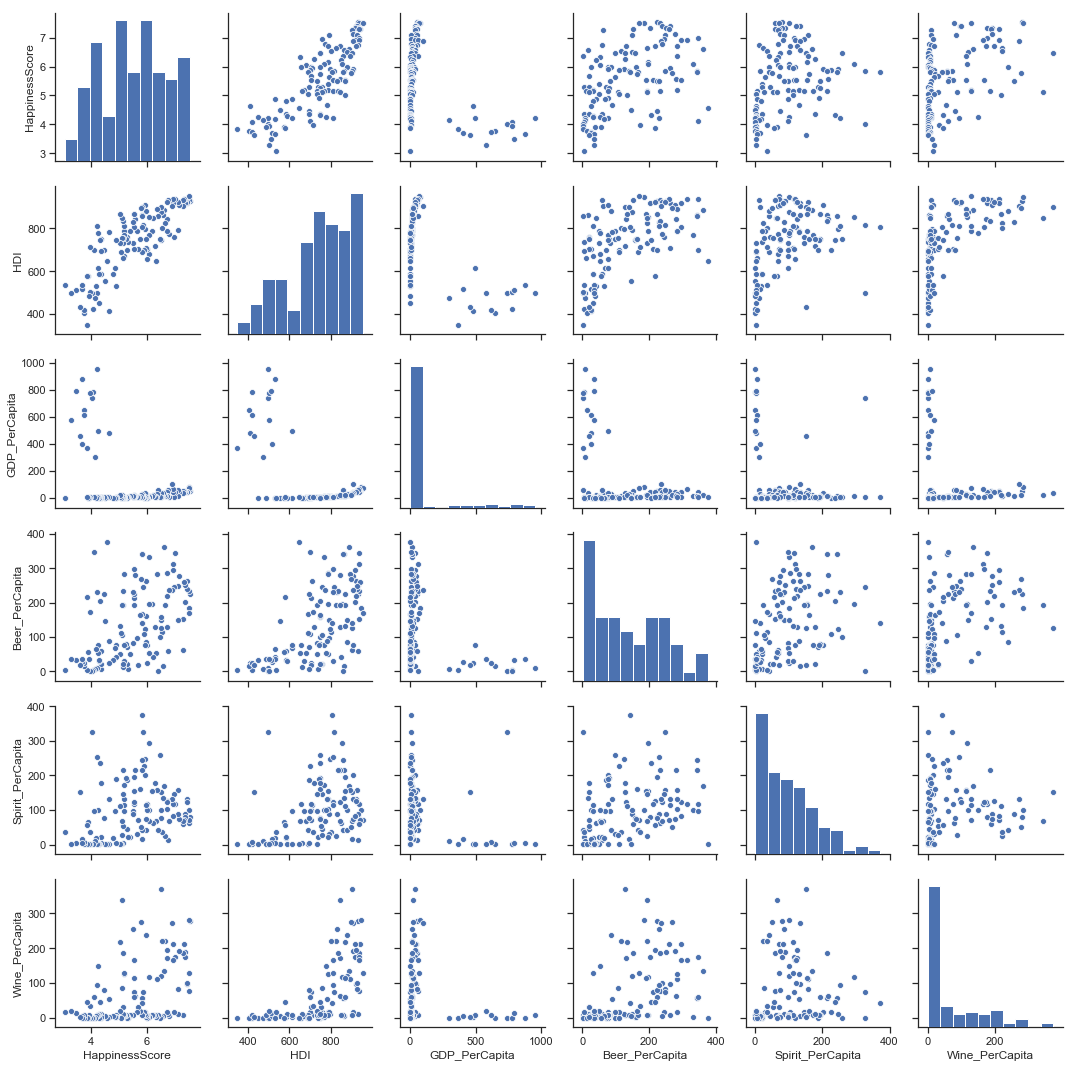

In [8]:
sns.set(style="ticks")
sns.pairplot(dados,x_vars=x_vars,y_vars=y_vars);

# Convertendo variável qualitativa para quantitativa 
* Região para uma variavel quantitativa

In [12]:
# list(dados)

In [13]:
dados.Region = dados.Region.astype("category")
dados.Hemisphere = dados.Region.astype("category")

In [14]:
def dummify(data, column_name):
    """
        Converte a coluna column_name em dummies / one-hot e as adiciona ao dataframe
        retorna uma copia do  df original sem a coluna que foi dummified
    """
    df = data.copy()
    # Nota: se você for um econometrista, pode se interessar por usar a opção dropFirst = True na get_dummies
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

In [15]:
res = dummify(dados, "Region") 
res.head()

,Country,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,Denmark,Western Europe,7.526,928,53.579,224,81,278,0,0,0,0,0,0,0,0,1
1,Switzerland,Western Europe,7.509,943,79.866,185,100,280,0,0,0,0,0,0,0,0,1
2,Iceland,Western Europe,7.501,933,60.530,233,61,78,0,0,0,0,0,0,0,0,1
3,Norway,Western Europe,7.498,951,70.890,169,71,129,0,0,0,0,0,0,0,0,1
4,Finland,Western Europe,7.413,918,43.433,263,133,97,0,0,0,0,0,0,0,0,1


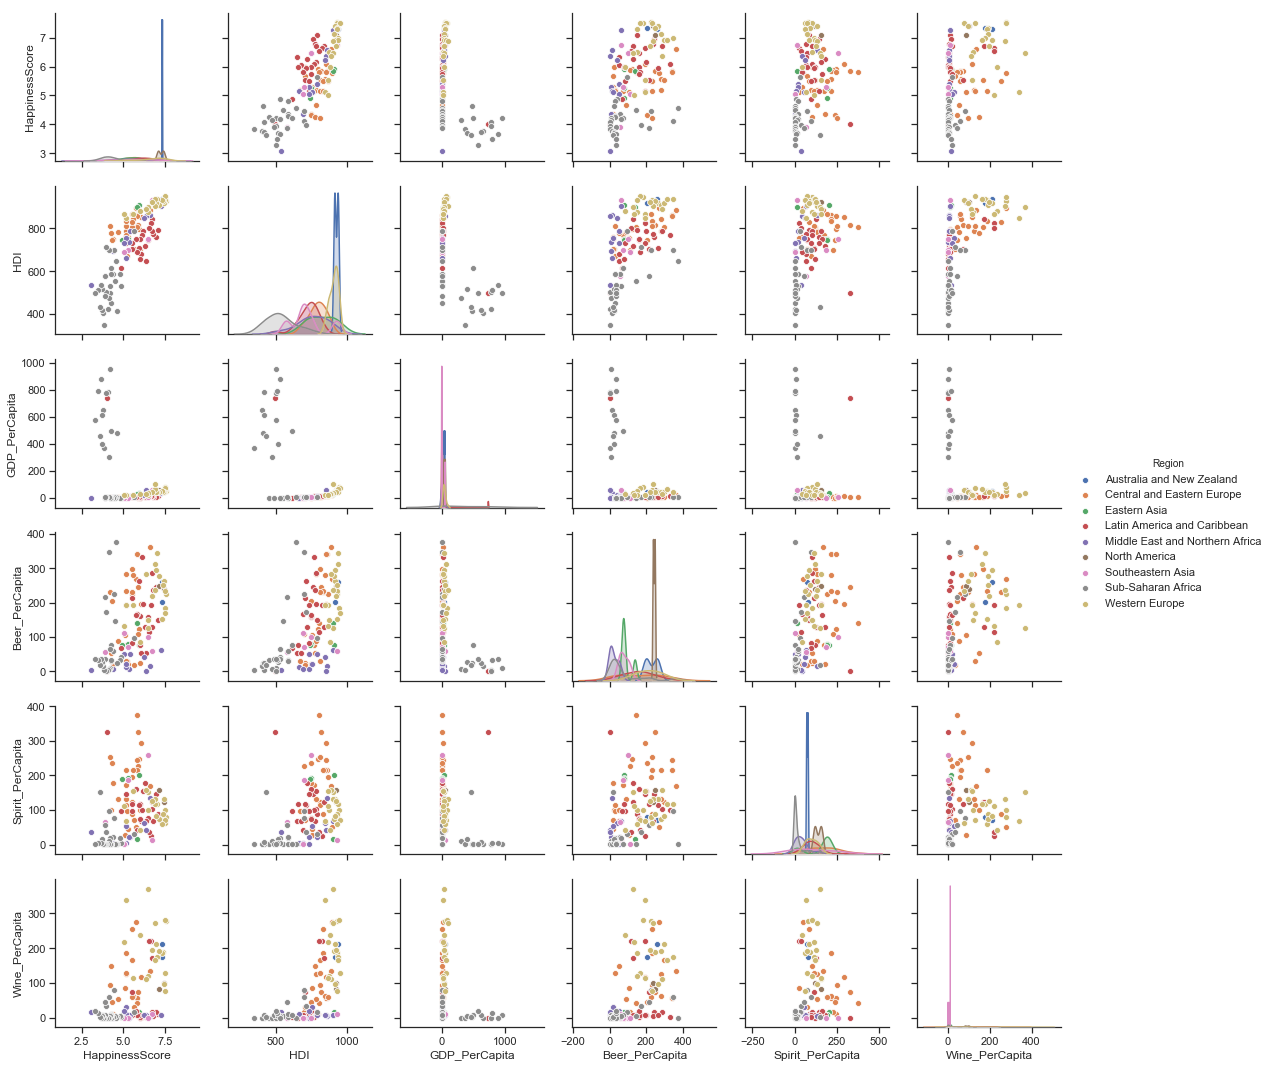

In [17]:
x_vars=["HappinessScore", "HDI", "GDP_PerCapita", "Beer_PerCapita","Spirit_PerCapita","Wine_PerCapita"]
y_vars = x_vars
sns.set(style="ticks");
sns.pairplot(dados,hue="Region",x_vars=x_vars,y_vars=y_vars)

# Inteirando 
* LOG do IDH e PIB e o histograma da felicidade

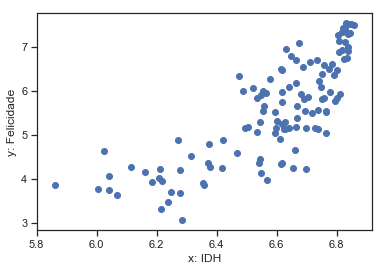

In [50]:
x = dados['HDI']
y = dados['HappinessScore']
x = np.log(x)
plt.scatter(x,y);
plt.xlabel("x: IDH");
plt.ylabel("y: Felicidade");

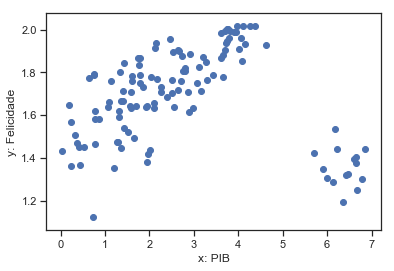

In [46]:
x2 = dados['GDP_PerCapita']
x2 = np.log(x2)
plt.scatter(x2,y);
plt.xlabel("x: PIB");
plt.ylabel("y: Felicidade");


In [51]:
dados.GDP_PerCapita.describe()

count    122.000000
mean      91.482836
std      209.577313
min        1.029000
25%        4.134250
50%       12.016000
75%       41.990000
max      953.000000
Name: GDP_PerCapita, dtype: float64

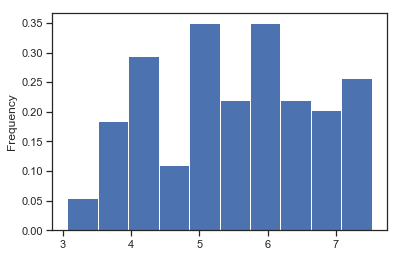

In [49]:
dados.HappinessScore.plot.hist(density=True)

# Interpretação dos dados

* Como nossa variável analisada será a felicidade, logo esta será nossa valor de saída (eixo y). Deste modo, analisaremos a primeira linha obtida no pairplot. 

* **Primeiro Gráfico (Happiness X Happiness):**
    Como o gráfico do pairplot deu uma distribuição gaussiana, plotamos o histograma do happiness.Lembrando que o Hapinness_Score é medido de 0 a 10, sendo 10 o maior nível de felicidade. Conseguimos analisar pelo histograma que a maior frequência está por volta de 5 e 6.
    
* **Segundo Gráfico (IDH X Happiness):**
    Como havia uma tendência de ser uma exponencial, podia haver discrepância nos valores, logo plotamos um gráfico fazendo um log no eixo x. A partir disso podemos analisar que quanto maior o IDH maior a felicidade. 
    
* **Terceiro Gráfico (IDH X Happiness):**
    Pela função describe() foi possível observar que cerca de 25% tem uma renda de 4.13425, como esta muito próximo do 0, causou uma verticalização dos pontos. Para conseguir analisarmos seu comportamento, aplicamos log no eixo x, no caso, o PIB. 
    Pelo gráfico conseguimos inferir que entre um PIB baixo e médio, teriamos um coeficiente positivo de uma reta, já para médio para alto, teriamos um coeficiente negativo da reta. Isto é, até um certo valor temos um crescimento da felcidade de acordo com o PIB, contudo a partir deste há um descrescimento da felicidade de acordo com o PIB.

* **Quarto, Quinto e Sexto Gráfico (Bebidas alcoólicas X Happiness):**
    Os dados do gráfico de bebida alcoólica e a felicidade apresentam uma dispersões dos valores, podemos concluir que há uma baixa correlação 

